# Employee Churn

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

### Here we take a look at the original dataset

In [2]:
df_raw = pd.read_csv('EmployeeData.csv')
df_raw.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Check & Remove any Null Values

In [3]:
df_raw.notnull()
df_nonull = df_raw.dropna()
df_nonull

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### There are no null values to remove

## Check and Remove Outliers

In [4]:
def plot_boxplot(df, feature):
    print(feature)
    df.boxplot(column=[feature])
    plt.grid(False)
    plt.show()


satisfaction_level


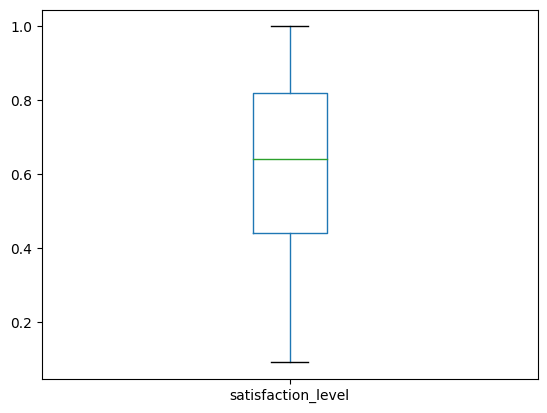

last_evaluation


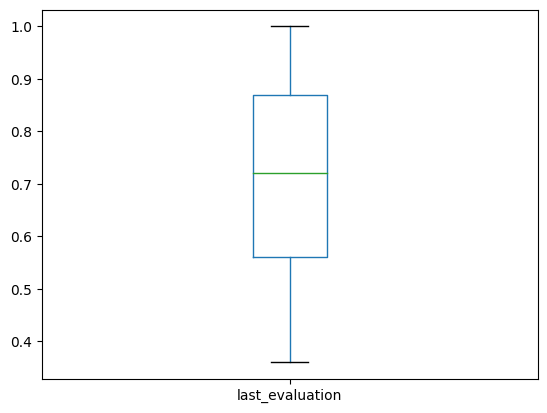

number_project


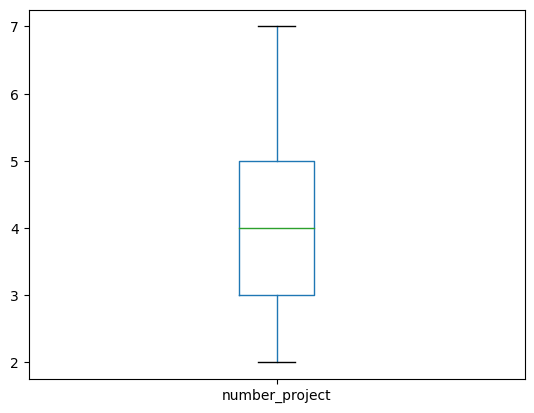

average_montly_hours


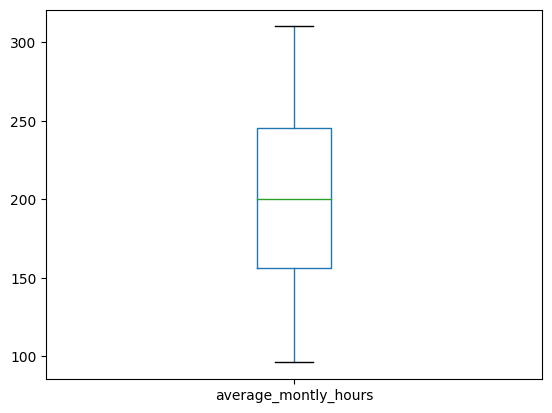

time_spend_company


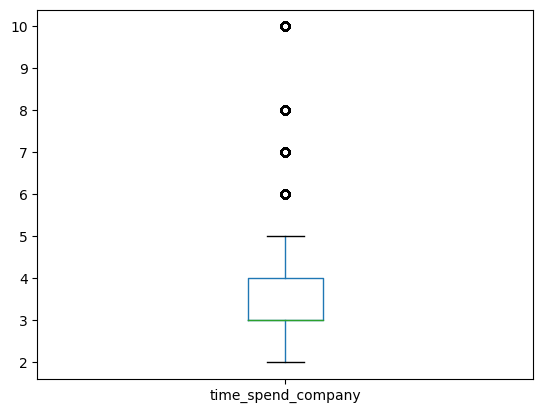

In [5]:
#boxplots for all of our numerical values
plot_boxplot(df_nonull, 'satisfaction_level')
plot_boxplot(df_nonull, 'last_evaluation')
plot_boxplot(df_nonull, 'number_project')
plot_boxplot(df_nonull, 'average_montly_hours')
plot_boxplot(df_nonull, 'time_spend_company')

### Overall I feel the outliers present in 'time_spend_company' were relevant ans should stay in the data for us to analyze

## Now me must use PCA in order to reduce the dimensions of our model so that we can avoid multicollinearity

### First we must find the eigenvectors and eigenvalues

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data
import numpy as np
import pandas as pd

### First we must change all values to numerical. Here I used One Hot coding to turn my categorical values into numerical.

In [12]:
#Remove categirical values
new = df_nonull.drop(["sales", "salary"], axis = 1)

#Creating Dummies
dummies = pd.get_dummies(df_nonull.sales)
merged = pd.concat([new, dummies], axis = 1)

dummies2 = pd.get_dummies(df_nonull.salary)
merged2 = pd.concat([merged, dummies2], axis = 1)

#Shuffling the dataset
shuffled = merged2.sample(frac = 1) 

#drop duplicate column 
draft = shuffled.T.drop_duplicates().T

#move 'left' to last column 
draft2 = draft.reindex(columns = [col for col in draft.columns if col != 'left'] + ['left'])
df = draft2.drop(columns=['RandD', 'medium'])

df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,left
13820,0.88,0.58,3.0,145.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1359,0.46,0.46,2.0,145.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7501,0.62,0.51,4.0,208.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10847,0.93,0.91,2.0,238.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12915,0.54,0.41,3.0,175.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11415,0.69,0.51,3.0,257.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9370,0.77,0.83,5.0,197.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5997,0.63,0.75,4.0,155.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
11291,0.62,0.91,3.0,251.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
%store 'df'

Stored 'df' (DataFrame)


In [139]:
X = numerical.iloc[:,0:20]
target = df_nonull['left'].to_numpy()
X.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,IT,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,left
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [140]:
target

array([1, 1, 1, ..., 1, 1, 1])

In [141]:
X_st =  StandardScaler().fit_transform(X)
pca_out = PCA().fit(X_st)

In [189]:
a = np.cumsum(pca_out.explained_variance_ratio_)
list(a)

[0.1212354860242589,
 0.21149297100069475,
 0.28452948908894965,
 0.3508220275218312,
 0.41073459925358163,
 0.46692190596912925,
 0.5214499809882956,
 0.5751710975739822,
 0.6282285686821417,
 0.6809575634951097,
 0.7314243904722995,
 0.77913615770979,
 0.8231261821680415,
 0.865001585466317,
 0.9064106161931865,
 0.9400245744997778,
 0.9714708674384432,
 0.9968916701638887,
 1.0,
 1.0]

In [190]:
loadings = pca_out.components_
loadings

array([[-3.65161393e-01,  6.33938151e-02,  1.36100769e-01,
         1.36577930e-01,  1.64366897e-01, -1.51087932e-01,
         5.96317452e-01, -8.09705112e-02, -7.54256694e-03,
         1.93299284e-02,  2.13365423e-02, -7.03828193e-02,
        -1.22565496e-02, -1.09250138e-02,  1.21399694e-02,
         8.07944406e-03,  2.75404954e-02, -1.56465016e-01,
         1.62205483e-01,  5.96317452e-01],
       [ 5.40904504e-02,  5.06658335e-01,  5.45885544e-01,
         5.19413216e-01,  2.87217942e-01,  4.51433861e-02,
        -1.19423206e-01,  7.86118701e-02,  4.91074448e-03,
         4.05336593e-03, -5.11487059e-02,  1.35075988e-01,
        -5.95283299e-03, -5.40773075e-03, -4.67850786e-02,
        -1.33406301e-02,  2.25164980e-02,  1.19863398e-01,
        -1.23072157e-01, -1.19423206e-01],
       [-1.72449994e-01, -1.86604271e-01, -1.13220334e-01,
        -1.40561009e-01,  2.38190736e-01, -4.26966962e-02,
         1.24166166e-01,  3.21732052e-01, -6.43976751e-02,
         5.40992162e-02,  2.9

In [143]:
pca_out.explained_variance_

array([2.42487139e+00, 1.80527006e+00, 1.46082776e+00, 1.32593917e+00,
       1.19833133e+00, 1.12382106e+00, 1.09063421e+00, 1.07449397e+00,
       1.06122017e+00, 1.05465021e+00, 1.00940384e+00, 9.54298969e-01,
       8.79859150e-01, 8.37563907e-01, 8.28235834e-01, 6.72323991e-01,
       6.28967793e-01, 5.08449953e-01, 6.21707417e-02, 3.54474322e-33])

In [179]:
pca_scores = PCA().fit_transform(X_st)
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=X.columns.values, var1=round(pca_out.explained_variance_ratio_[0]*100, 2),
    var2=round(pca_out.explained_variance_ratio_[1]*100, 2), colorlist=target)


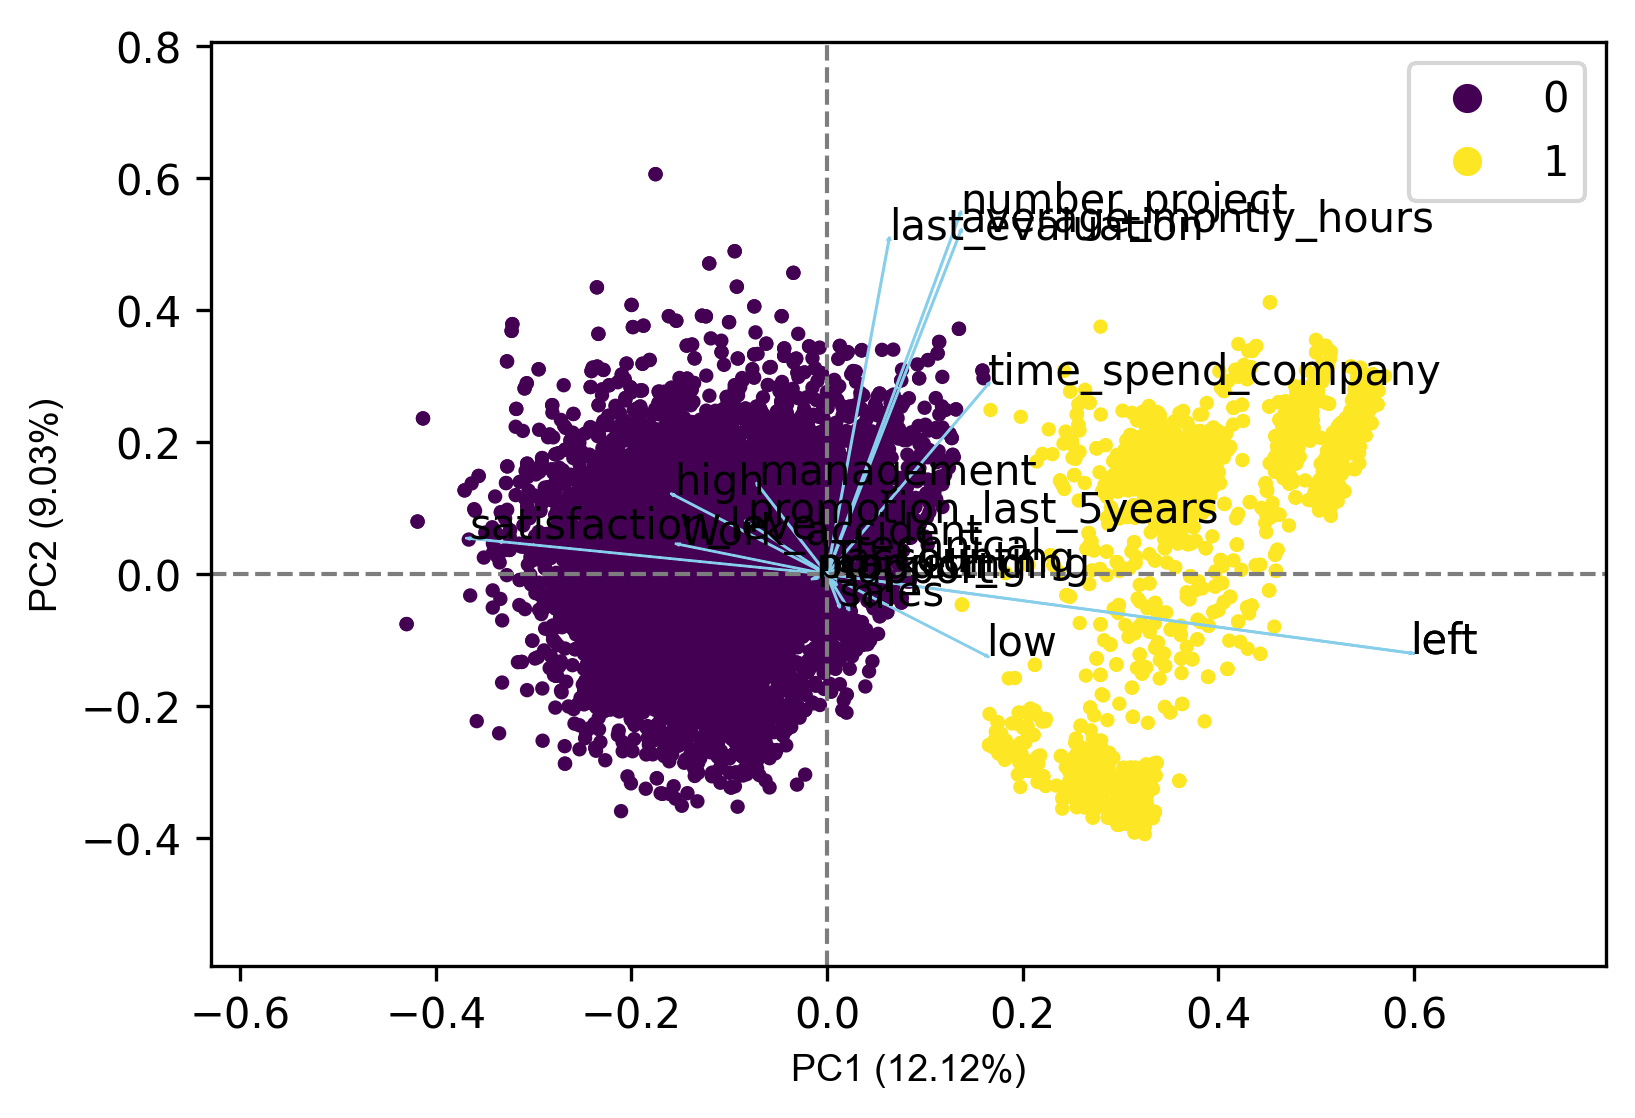

In [183]:
pd.DataFrame(loadings)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.365161,0.063394,0.136101,0.136578,0.164367,-0.151088,0.596317,-0.080971,-0.007543,0.019330,0.021337,-0.070383,-0.012257,-0.010925,0.012140,0.008079,0.027540,-0.156465,0.162205,0.596317
1,0.054090,0.506658,0.545886,0.519413,0.287218,0.045143,-0.119423,0.078612,0.004911,0.004053,-0.051149,0.135076,-0.005953,-0.005408,-0.046785,-0.013341,0.022516,0.119863,-0.123072,-0.119423
2,-0.172450,-0.186604,-0.113220,-0.140561,0.238191,-0.042697,0.124166,0.321732,-0.064398,0.054099,0.029552,0.476503,0.085549,-0.043359,-0.040386,-0.131110,-0.102735,0.511431,-0.418117,0.124166
3,0.021793,0.000289,0.013880,0.027494,0.090887,0.021455,-0.017173,0.102512,-0.116970,-0.082858,-0.084396,-0.044531,-0.060553,-0.092799,0.827208,-0.252649,-0.424199,-0.077160,0.053134,-0.017173
4,0.014385,0.034919,-0.012819,0.001994,0.031809,0.039729,0.016134,0.007987,0.090141,0.052329,0.051460,0.041247,0.072506,0.063058,-0.126236,0.674536,-0.706609,-0.017869,0.015344,0.016134
5,-0.005553,0.006123,0.010178,0.023295,-0.002223,-0.120109,-0.017649,-0.133921,0.657786,0.206937,0.186081,-0.062097,0.078159,0.308362,-0.119402,-0.489281,-0.310595,-0.008155,-0.030402,-0.017649
6,0.039499,0.032363,-0.028231,-0.005767,0.087840,0.215312,0.002324,0.319029,-0.158517,-0.049535,0.070092,-0.047926,0.816624,-0.022424,-0.131668,-0.172721,-0.048541,-0.218075,0.203583,0.002324
7,-0.010090,0.018719,0.022196,0.012604,-0.028142,-0.027314,-0.011305,-0.089199,-0.599461,0.262577,0.169745,-0.058610,-0.064896,0.711860,-0.020570,-0.092503,-0.081262,0.023698,-0.038680,-0.011305
8,0.040923,0.074569,0.010035,0.066520,-0.141165,-0.155554,-0.016584,0.016336,-0.177993,0.416996,0.664654,-0.149709,-0.026525,-0.506250,0.001343,-0.037069,-0.049198,-0.003474,-0.112918,-0.016584
9,-0.064503,-0.041593,0.016578,-0.027778,0.011821,0.050035,-0.024379,-0.014213,-0.015332,0.775371,-0.592500,-0.074398,0.072368,-0.155894,-0.004549,-0.003030,-0.001506,0.002260,0.037742,-0.024379


In [194]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(loadings.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(loadings[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-loadings[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {numerical.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['left', 'left', 'time_spend_company', 'low']
Component 1: ['number_project', 'average_montly_hours', 'last_evaluation', 'time_spend_company']
Component 2: ['high', 'management', 'promotion_last_5years', 'time_spend_company']
Component 3: ['sales', 'promotion_last_5years', 'time_spend_company', 'low']
Component 4: ['support', 'IT', 'marketing', 'product_mng']
Component 5: ['IT', 'product_mng', 'accounting', 'hr']
Component 6: ['marketing', 'promotion_last_5years', 'Work_accident', 'low']
Component 7: ['product_mng', 'accounting', 'hr', 'high']
Component 8: ['hr', 'accounting', 'last_evaluation', 'average_montly_hours']
Component 9: ['accounting', 'marketing', 'Work_accident', 'low']
Component 10: ['Work_accident', 'low', 'management', 'promotion_last_5years']
Component 11: ['management', 'low', 'satisfaction_level', 'promotion_last_5years']
Component 12: ['promotion_last_5years', 'product_mng', 'IT', 'support']
Component 13: 

# Exploratory Data Analysis 